# Phase 4







## Unsupervised ML (Clustering)








4.1  "Create 3 clusters as below.







1. Sensitive Area's







2. Moderate Area's







3. Peaceful Area's"







4.2  Create DataFrame for each cluster that shows data according to the areas.







4.3  "Analyse your clusters and prepare a report that explains all your observations.











4.4   Capstone project overall story in your own words. Min 1000 words.

## 4.1 Create 3 clusters as below.

###### 1. Sensitive Area's
###### 2. Moderate Area's
###### 3. Peaceful Area's

In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the datasets
pd.set_option("display.max_columns",None)
crime_ipc = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
crime_ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,14,3,5,14,13,56,577,409,168,109,8,75,5,20,632,0,7,2,5,0,219,1668,3494


In [3]:
crime_ipc.shape

(9017, 33)

In [4]:
# CHeckimh missing values
crime_ipc.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [5]:
# checking duplicate values
crime_ipc.duplicated().sum()

0

In [6]:
#removing unnecessary index DELHI UT TOTAL
totals = crime_ipc[crime_ipc['DISTRICT'] == 'TOTAL'].index
ut_total = crime_ipc[crime_ipc['DISTRICT'] == 'DELHI UT TOTAL'].index


In [7]:
crime_ipc.drop(totals, axis = 0 ,inplace = True)
crime_ipc.drop(ut_total, axis = 0 ,inplace = True)

In [8]:
crime_ipc.reset_index(drop = True, inplace = True)


In [9]:
crime_ipc.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507


In [10]:
# seperating numerical values for KMeans clustering
x = crime_ipc.iloc[:,2:]
x

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,6
8593,2012,52,37,10,79,0,79,454,256,198,2,4,52,186,2352,1733,619,5,36,202,2,18,227,18,53,6,327,0,292,1144,5558
8594,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
8595,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787


In [11]:
# Using elbow method to find cluster numbers
wcss = []   # within cluster sum of squares
for i in range(1,10):
    kmeans = KMeans(n_clusters = i , init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

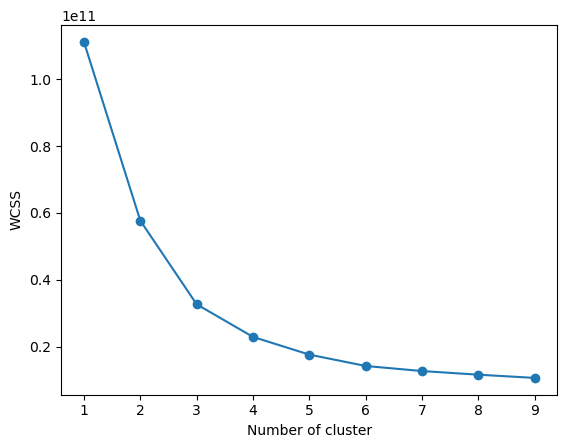

In [12]:
#ploting the graph
plt.plot(range(1,10),wcss, marker = 'o')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
#finding k value
#!pip install kneed

In [14]:
from kneed import KneeLocator

In [15]:
kl = KneeLocator(range(1,10),wcss,curve = 'convex', direction = 'decreasing')
kl.elbow

3

In [16]:
kmeans = KMeans(n_clusters = 3,init='k-means++')
y_means = kmeans.fit_predict(x)

print(y_means)

[1 1 1 ... 0 0 1]


In [17]:
# Cluster centers
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 1])

In [18]:
# moderate Area's
x[y_means == 0]

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
3,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
5,2001,3,1,0,0,0,0,0,0,0,5,0,2,0,162,0,162,1,0,0,3,0,1,0,1,0,0,0,4,104,287
13,2001,101,56,12,35,0,35,26,20,6,27,0,26,219,286,36,250,100,17,87,4,37,1367,26,100,25,192,0,335,454,3532
19,2001,6,0,0,0,0,0,0,0,0,0,0,10,2,296,0,296,1,2,4,25,0,17,1,0,1,0,0,6,68,439
20,2001,38,10,4,8,0,8,12,12,0,1,0,4,118,231,1,230,70,18,53,0,34,679,6,38,47,108,0,167,926,2572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,2012,9,6,1,5,0,5,28,13,15,0,0,9,25,374,138,236,12,14,132,16,1,16,0,29,7,4,0,67,302,1057
8585,2012,25,17,2,14,0,14,153,84,69,0,0,45,97,1025,612,413,5,37,127,3,3,92,6,29,10,70,0,13,927,2700
8592,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,6
8594,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60


In [19]:
# peaceful Area's
x[y_means == 1]

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
4,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
6,2001,182,88,2,54,0,54,82,51,31,16,3,59,338,1122,171,951,244,67,300,8,43,1792,7,139,129,378,0,369,2426,7848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2012,39,19,3,70,0,70,245,134,111,2,0,52,235,2126,1354,772,3,33,256,1,4,101,17,59,36,68,0,25,1651,5045
8590,2012,46,69,6,116,0,116,538,306,232,2,2,72,201,2892,2045,847,12,45,207,10,11,252,11,160,43,123,0,218,2004,7040
8591,2012,47,48,6,87,0,87,399,244,155,0,1,47,211,1171,800,371,6,27,189,3,6,131,18,69,21,207,0,4,1387,4085
8593,2012,52,37,10,79,0,79,454,256,198,2,4,52,186,2352,1733,619,5,36,202,2,18,227,18,53,6,327,0,292,1144,5558


In [20]:
# Sensitive Area's
x[y_means == 2]

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
133,2001,90,58,60,39,0,39,143,117,26,18,4,192,695,3588,1740,1848,191,140,205,13,2,1311,7,54,27,530,0,0,6129,13496
244,2001,221,327,5,40,0,40,152,56,96,31,25,284,2108,6293,2401,3892,298,258,1708,79,3,3735,40,223,51,229,0,38,11106,27254
276,2001,44,67,7,38,0,38,20,7,13,25,0,80,592,1264,294,970,626,22,267,12,25,1756,3,162,3,161,0,0,9669,14843
294,2001,61,109,0,106,0,106,55,48,7,8,6,99,852,1351,425,926,77,33,192,0,8,652,15,252,56,132,0,272,9372,13708
307,2001,111,133,1,84,0,84,50,35,15,5,10,112,874,2708,1360,1348,129,59,149,3,29,1306,25,215,63,161,0,269,6567,13063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2012,123,172,3,173,0,173,54,42,12,4,5,275,1190,4370,2904,1466,82,39,205,6,64,1064,24,405,114,448,0,452,11819,21091
8231,2012,215,170,9,232,0,232,212,141,71,29,29,1131,2500,10851,4075,6776,374,564,1827,48,86,3939,11,614,235,388,0,621,6423,30508
8405,2012,180,219,4,94,0,94,87,65,22,2,0,85,546,2169,263,1906,95,50,769,137,10,1412,12,90,141,237,0,1411,12131,19881
8542,2012,224,8,28,244,0,244,419,419,0,34,58,35,51,1279,194,1085,1976,4,250,6,15,234,45,83,0,1666,0,70,7641,14370


In [21]:
df = pd.DataFrame(data = crime_ipc)

In [22]:
df.shape

(8597, 33)

### 4.2 Create DataFrame for each cluster that shows data according to the areas.

In [23]:
#Creating the dataFrame for each cluster
# Sensitive Area's
sensi_area = x[y_means == 2]
sensitive = pd.DataFrame(data =sensi_area)

sensitive

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
133,2001,90,58,60,39,0,39,143,117,26,18,4,192,695,3588,1740,1848,191,140,205,13,2,1311,7,54,27,530,0,0,6129,13496
244,2001,221,327,5,40,0,40,152,56,96,31,25,284,2108,6293,2401,3892,298,258,1708,79,3,3735,40,223,51,229,0,38,11106,27254
276,2001,44,67,7,38,0,38,20,7,13,25,0,80,592,1264,294,970,626,22,267,12,25,1756,3,162,3,161,0,0,9669,14843
294,2001,61,109,0,106,0,106,55,48,7,8,6,99,852,1351,425,926,77,33,192,0,8,652,15,252,56,132,0,272,9372,13708
307,2001,111,133,1,84,0,84,50,35,15,5,10,112,874,2708,1360,1348,129,59,149,3,29,1306,25,215,63,161,0,269,6567,13063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2012,123,172,3,173,0,173,54,42,12,4,5,275,1190,4370,2904,1466,82,39,205,6,64,1064,24,405,114,448,0,452,11819,21091
8231,2012,215,170,9,232,0,232,212,141,71,29,29,1131,2500,10851,4075,6776,374,564,1827,48,86,3939,11,614,235,388,0,621,6423,30508
8405,2012,180,219,4,94,0,94,87,65,22,2,0,85,546,2169,263,1906,95,50,769,137,10,1412,12,90,141,237,0,1411,12131,19881
8542,2012,224,8,28,244,0,244,419,419,0,34,58,35,51,1279,194,1085,1976,4,250,6,15,234,45,83,0,1666,0,70,7641,14370


In [24]:
# Moderate Area's
mod_area = x[y_means == 0]
moderate = pd.DataFrame(data =mod_area)
moderate

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
3,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
5,2001,3,1,0,0,0,0,0,0,0,5,0,2,0,162,0,162,1,0,0,3,0,1,0,1,0,0,0,4,104,287
13,2001,101,56,12,35,0,35,26,20,6,27,0,26,219,286,36,250,100,17,87,4,37,1367,26,100,25,192,0,335,454,3532
19,2001,6,0,0,0,0,0,0,0,0,0,0,10,2,296,0,296,1,2,4,25,0,17,1,0,1,0,0,6,68,439
20,2001,38,10,4,8,0,8,12,12,0,1,0,4,118,231,1,230,70,18,53,0,34,679,6,38,47,108,0,167,926,2572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,2012,9,6,1,5,0,5,28,13,15,0,0,9,25,374,138,236,12,14,132,16,1,16,0,29,7,4,0,67,302,1057
8585,2012,25,17,2,14,0,14,153,84,69,0,0,45,97,1025,612,413,5,37,127,3,3,92,6,29,10,70,0,13,927,2700
8592,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,6
8594,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60


In [25]:
# Praceful Area's
peace_area = x[y_means == 1]
peaceful = pd.DataFrame(data = peace_area)
peaceful

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
4,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
6,2001,182,88,2,54,0,54,82,51,31,16,3,59,338,1122,171,951,244,67,300,8,43,1792,7,139,129,378,0,369,2426,7848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2012,39,19,3,70,0,70,245,134,111,2,0,52,235,2126,1354,772,3,33,256,1,4,101,17,59,36,68,0,25,1651,5045
8590,2012,46,69,6,116,0,116,538,306,232,2,2,72,201,2892,2045,847,12,45,207,10,11,252,11,160,43,123,0,218,2004,7040
8591,2012,47,48,6,87,0,87,399,244,155,0,1,47,211,1171,800,371,6,27,189,3,6,131,18,69,21,207,0,4,1387,4085
8593,2012,52,37,10,79,0,79,454,256,198,2,4,52,186,2352,1733,619,5,36,202,2,18,227,18,53,6,327,0,292,1144,5558


In [26]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [27]:
k = pd.DataFrame(data = kmeans.labels_)
k

,0
0,1
1,1
2,1
3,0
4,1
...,...
8592,0
8593,1
8594,0
8595,0


In [28]:
df['Area Type'] = pd.DataFrame(data = kmeans.labels_)
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Area Type
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154,1
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125,1
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818,1
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,6,0
8593,DELHI UT,WEST,2012,52,37,10,79,0,79,454,256,198,2,4,52,186,2352,1733,619,5,36,202,2,18,227,18,53,6,327,0,292,1144,5558,1
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60,0
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787,0


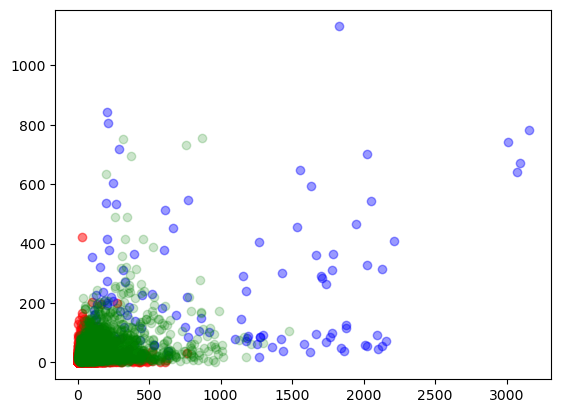

In [42]:
# plotting all the clusters
plt.scatter(df[y_means == 0]['CHEATING'],df[y_means == 0]['ROBBERY'],label = 'Cluster', c= 'r',alpha = 0.5)
plt.scatter(df[y_means == 2]['CHEATING'],df[y_means == 2]['ROBBERY'],label = 'Cluster', c= 'b',alpha = 0.4)
plt.scatter(df[y_means == 1]['CHEATING'],df[y_means == 1]['ROBBERY'],label = 'Cluster', c= 'g',alpha = 0.2)

plt.show()


In [30]:
#Creating the csv file for the above data
df.to_csv("area_crime.csv")

In [31]:
# Saving the model
import joblib

In [32]:
joblib.dump(kmeans,'KMeans model for area type.obj')

['KMeans model for area type.obj']

### 4.3 Analyse your clusters and prepare a report that explains all your observations.

#### 1. What is impacting more crimes in sensitive areas. 
 A Focus on Theft, Hurt/Grievous Hurt, and Other IPC Crimes
###### Summary:

This report delves into the factors influencing crime rates in sensitive areas, with a specific focus on the prevalence of theft, hurt/grievous hurt, and other IPC (Indian Penal Code) crimes. 
##### Introduction:

Sensitive areas often grapple with higher crime rates, posing challenges for law enforcement and communities. Understanding the specific crime types that dominate these areas is crucial for implementing targeted interventions. In this report, we examine theft, hurt/grievous hurt, and other IPC crimes to shed light on the dynamics at play.

1. Theft Rates:

Theft emerges as a significant concern in sensitive areas. Factors contributing to high theft rates may include socio-economic disparities, lack of effective surveillance, and unemployment. Poverty and desperation can drive individuals to resort to theft as a means of survival. Additionally, insufficient policing and community engagement may further exacerbate the problem.

##### Recommendations:

Strengthen community policing initiatives to build trust and cooperation.
Enhance surveillance infrastructure through the deployment of technology.
Implement social welfare programs to address economic disparities.
2. Hurt/Grievous Hurt Rates:

The prevalence of hurt/grievous hurt crimes suggests a potential escalation of violence in sensitive areas. This could be attributed to factors such as gang activities, personal disputes, and limited access to quality healthcare. Tensions within communities may contribute to an environment where physical altercations escalate into more serious offenses.

##### Recommendations:

Increase police presence and patrols in identified hotspots.
Promote conflict resolution programs within communities.
Enhance medical facilities to ensure prompt treatment for victims.
3. Other IPC Crimes:

Apart from theft and physical harm, sensitive areas often experience higher rates of other IPC crimes. These can encompass a wide range of offenses, including vandalism, public order crimes, and property damage. These crimes may be symptomatic of broader issues such as substance abuse, social unrest, and inadequate educational opportunities.

##### Recommendations:

Implement community-based rehabilitation programs for substance abuse.
Enhance educational and vocational training opportunities.
Strengthen community organizations to address underlying social issues.
Conclusion:

Addressing crime in sensitive areas requires a multi-faceted approach that considers the unique dynamics at play. Targeted interventions aimed at reducing theft, hurt/grievous hurt, and other IPC crimes must be informed by a thorough understanding of the socio-economic, cultural, and environmental factors influencing these offenses. Collaboration between law enforcement, community organizations, and policymakers is crucial for developing effective strategies that promote safety and well-being in sensitive areas.


#### What needs to be done to reduce crime ?

1. **Community Engagement:** Strengthen ties between police and communities, promoting trust and cooperation.

2. **Education and Employment:** Invest in education, vocational training, and job opportunities to address root causes of crime.

3. **Social Support:** Implement social welfare programs to alleviate poverty and provide assistance to vulnerable populations.

4. **Mental Health and Substance Abuse Treatment:** Enhance services for mental health and substance abuse, reducing links between addiction and criminal behavior.

5. **Youth Programs:** Develop youth outreach and mentorship programs, offering positive alternatives to crime.

6. **Policing Strategies:** Utilize data-driven policing, technology, and training for officers in de-escalation and community-oriented approaches.

7. **Legal Reforms:** Evaluate sentencing policies, promote alternatives to incarceration, and address systemic biases in the criminal justice system.

8. **Collaboration:** Foster cooperation between law enforcement, community organizations, and government agencies.

9. **Public Awareness:** Educate the public about crime consequences and encourage community involvement in prevention efforts.

10. **Restorative Justice:** Implement programs that focus on repairing harm, addressing root issues, and reintegrating offenders into the community.

###  Most safe and unsafe districts 

**This report examines crime rates in the top 10 safest and most unsafe districts based on the provided dataset. The analysis focuses on the Total IPC (Indian Penal Code) crimes, area type, district, and state/union territory information.**

In [33]:
dist = df.groupby(['TOTAL IPC CRIMES','Area Type','DISTRICT','STATE/UT'], sort = True).size().reset_index()
top10 = dist.head(10)
top10

,TOTAL IPC CRIMES,Area Type,DISTRICT,STATE/UT,0
0,0,0,S.T.F.,DELHI UT,2
1,1,0,CID,MANIPUR,1
2,1,0,G.R.P.,HIMACHAL PRADESH,1
3,2,0,CID,HIMACHAL PRADESH,2
4,2,0,CID,MANIPUR,4
5,2,0,RAILWAYS KATRA,JAMMU & KASHMIR,1
6,4,0,G.R.P.,HIMACHAL PRADESH,2
7,5,0,CID,HIMACHAL PRADESH,2
8,5,0,UPPER DIBANG VALLEY,ARUNACHAL PRADESH,2
9,6,0,G.R.P.,HIMACHAL PRADESH,1


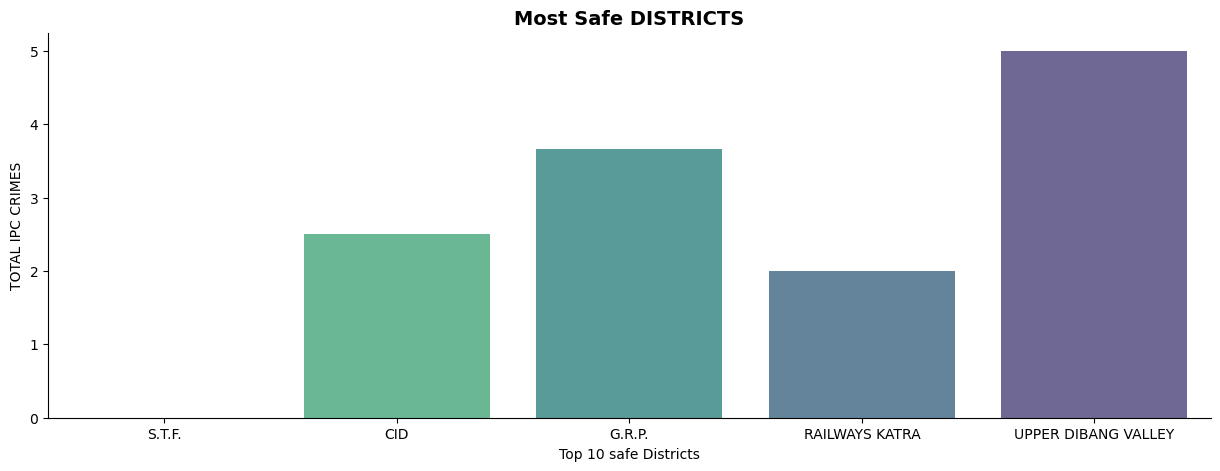

In [34]:

plt.figure(figsize =(15,5))
sns.barplot(x = 'DISTRICT',y = 'TOTAL IPC CRIMES', data = top10, ci =0, palette = 'viridis_r', alpha = 0.8)
plt.xlabel("Top 10 safe Districts")
plt.ylabel("TOTAL IPC CRIMES")
sns.despine()
plt.title('Most Safe DISTRICTS', fontweight = 'bold', fontsize = 14)
plt.show()

The identified safest districts generally exhibit low counts of IPC crimes. Notable areas include those under Special Task Force (S.T.F.) in Delhi, CID in Manipur, and G.R.P. in Himachal Pradesh. The low crime counts may be attributed to effective law enforcement, community engagement, and proactive security measures.

In [35]:
tail_10 = dist.tail(10)
tail_10

,TOTAL IPC CRIMES,Area Type,DISTRICT,STATE/UT,0
8437,30508,2,MUMBAI COMMR.,MAHARASHTRA,1
8438,31070,2,MUMBAI COMMR.,MAHARASHTRA,1
8439,31262,2,MUMBAI COMMR.,MAHARASHTRA,1
8440,31432,2,MUMBAI,MAHARASHTRA,1
8441,32188,2,BANGALORE COMMR.,KARNATAKA,1
8442,32380,2,BANGALORE COMMR.,KARNATAKA,1
8443,32647,2,MUMBAI COMMR.,MAHARASHTRA,1
8444,32770,2,MUMBAI COMMR.,MAHARASHTRA,1
8445,33932,2,MUMBAI COMMR.,MAHARASHTRA,1
8446,34638,2,ERNAKULAM RURAL,KERALA,1


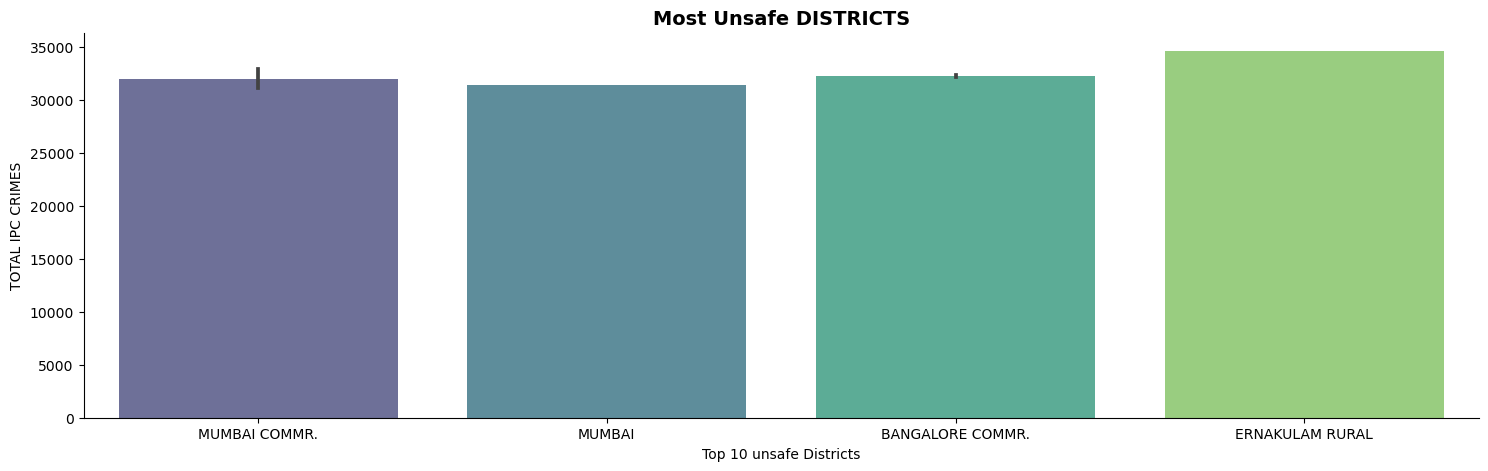

In [36]:
plt.figure(figsize =(18,5))
sns.barplot(x = 'DISTRICT',y = 'TOTAL IPC CRIMES', data = tail_10, palette = 'viridis', alpha = 0.8)
plt.xlabel("Top 10 unsafe Districts")
plt.ylabel("TOTAL IPC CRIMES")
plt.title('Most Unsafe DISTRICTS', fontweight = 'bold', fontsize = 14)
sns.despine()

plt.show()

The identified most unsafe districts appear to have consistently low counts of IPC crimes, suggesting that these areas have relatively higher crime rates. The Mumbai Commissionerate in Maharashtra and Bangalore Commissionerate in Karnataka feature prominently in the list. Factors contributing to higher crime rates in these areas may include urbanization, population density, and socio-economic challenges.

### Conclusion:

This analysis provides insights into the crime rates in the top 10 safest and most unsafe districts. Understanding the characteristics of these districts is essential for law enforcement agencies, policymakers, and communities to develop targeted strategies for crime prevention and community safety. Further, a more in-depth analysis, including demographic and socio-economic factors, could provide a holistic understanding of crime dynamics in these regions.

### What motivates a person to commit a crime?
Understanding the motivations behind criminal behavior is a complex task that involves considering various factors, as criminal behavior is often influenced by a combination of individual, social, economic, and environmental elements. Here are some common factors that can contribute to criminal behavior:

**Socio-economic Factors:**

1. **Poverty:** Economic deprivation and lack of access to resources may lead individuals to resort to criminal activities for survival.
2. **Unemployment:** Limited employment opportunities can contribute to frustration and desperation, pushing individuals towards criminal behavior.
**Psychological Factors:**

1. **Mental Health Issues:** Individuals with untreated mental health disorders may engage in criminal behavior due to impaired judgment or impulse control.
2. **Personality Disorders:** Certain personality disorders, such as antisocial personality disorder, are associated with an increased risk of criminal conduct.
**Family Environment:**

1. **Family Dysfunction:** A lack of a stable and supportive family environment, including issues such as abuse or neglect, can contribute to criminal behavior.
2. **Broken Homes:** Children from broken or dysfunctional homes may face challenges in terms of emotional support and guidance.

**Substance Abuse:**

1. **Drug and Alcohol Addiction:** Substance abuse can impair judgment and lower inhibitions, leading to an increased likelihood of engaging in criminal activities.
2. **Drug-Related Crime:** Involvement in the drug trade often exposes individuals to criminal behavior as a means of protection or competition.
**Educational Factors:**

1. **Low Educational Attainment:** Limited access to quality education can contribute to a lack of opportunities and an increased likelihood of criminal behavior.
2. **School Dropout:** Individuals who drop out of school may face challenges in finding legitimate employment, increasing the risk of criminal involvement.
**Cultural and Environmental Influences:**

1. **Cultural Norms:** Cultural factors that normalize or glorify certain criminal activities may influence individuals to engage in those behaviors.
2. **Neighborhood Environment:** Living in high-crime neighborhoods with limited access to resources and opportunities can contribute to criminal behavior.

3. **Absence of Role Models:** A lack of positive role models or mentors can leave individuals without guidance and positive influences, increasing the risk of criminal involvement.

### STEPS FOR REDUCING CRIMES
Certainly! Here are modified questions for each step outlined in the answer on reducing crime:

1. **Community Policing:**
   - How can law enforcement agencies measure the success of their efforts in building trust within communities?
   - Are there specific training modules or resources that have proven effective in enhancing police-community relations?

2. **Education and Employment Opportunities:**
   - What indicators or metrics can be used to assess the impact of education and vocational training programs on crime reduction?
   - In addressing economic disparities, what policy interventions have demonstrated positive outcomes in creating sustainable employment?

3. **Social Support Programs:**
   - Can you share examples of social welfare programs that have successfully addressed the root causes of criminal behavior?
   - How can communities ensure that mental health services are accessible and effectively utilized by those in need?

4. **Youth Engagement:**
   - What metrics or benchmarks can be used to evaluate the success of youth engagement programs in crime prevention?
   - How can communities ensure the scalability and long-term sustainability of successful mentorship initiatives?

5. **Crime Prevention Through Environmental Design (CPTED):**
   - Are there specific case studies highlighting the measurable impact of CPTED strategies on crime rates?
   - How can community members actively participate in the planning and execution of CPTED modifications in their neighborhoods?

6. **Gun Control Measures:**
   - What statistical evidence exists to link stricter gun control measures with reduced crime rates?
   - How can public awareness campaigns be tailored to effectively convey the importance of responsible gun ownership and support for stricter regulations?

7. **Community Outreach and Education:**
   - In your experience, what innovative methods have proven successful in engaging communities through outreach and education?
   - How can collaborative efforts with schools, religious institutions, and community organizations be enhanced to maximize the impact of crime prevention education?

8. **Restorative Justice Programs:**
   - Can you provide specific examples of communities where restorative justice programs have led to a decrease in recidivism and crime rates?
   - How can communities ensure that restorative justice practices are culturally sensitive and inclusive?

9. **Improving Policing Strategies:**
   - What key performance indicators should law enforcement agencies track to evaluate the effectiveness of data-driven policing techniques?
   - In enhancing officer training, what role can community feedback play in shaping more effective de-escalation and cultural sensitivity programs?

10. **Legal Reforms:**
    - Are there instances where jurisdictions have successfully balanced the need for legal reforms with maintaining public safety and order?
    - How can policymakers navigate public perception and resistance when advocating for changes in sentencing policies?

11. **Neighborhood Watch Programs:**
    - How can technology integration enhance the efficiency and effectiveness of neighborhood watch programs?
    - What strategies can be employed to encourage wider community participation in neighborhood watch initiatives?

12. **Technology and Surveillance:**
    - What ethical guidelines should be established to govern the implementation of surveillance technologies in crime prevention?
    - How can communities address concerns related to privacy and potential misuse of predictive policing models?

13. **Cross-Agency Collaboration:**
    - What structural changes or mechanisms can facilitate more seamless collaboration between law enforcement, government, and community organizations?
    - How can communities ensure that information sharing is transparent and serves the best interests of public safety?

14. **Public Awareness Campaigns:**
    - What factors contribute to the success of public awareness campaigns in fostering a culture of active citizenship and safety responsibility?
    - How can communities tailor messages to resonate with diverse demographics and cultural backgrounds?

15. **Evaluate and Adjust Strategies:**
    - What methodologies or tools can communities adopt to continuously evaluate the impact of crime reduction strategies?
    - How can feedback loops be established to facilitate ongoing communication between stakeholders for strategy adjustments?

### 4.4   Capstone project overall story in your own words.

The journey began by acquiring extensive crime datasets from law enforcement agencies across the country. The data, a digital mosaic of incidents ranging from petty theft to complex cyber crimes, reflects the dynamic nature of criminal activity in a nation with a rich tapestry of tradition and complexity.


As the data began to take shape, it entered exploratory data analysis, navigating through a wide expanse of crime hotspots, temporal trends, and demographic correlations. We uncover surprising insights into the ebb and flow of criminal activity across regions, the impact of socio-economic factors on crime rates, and the emergence of new patterns that reflect India's ever-evolving landscape.



Still, the journey was not without its moral considerations. addressed issues of bias in the data, ensuring that their analysis considered the various cultural and social contexts that shaped crime in different regions of India. Sensitivity to these nuances became integral to the project's success.

The capstone project evolved into a collaborative effort, expanding beyond the realm of data analysis. The team engaged with local communities, law enforcement agencies, and policymakers to ensure that their findings were not only statistically robust, but also culturally and socially relevant. This collaborative approach allowed the project to weave a narrative that resonated with the complex tapestry of Indian society.

The final phase of the project involved the implementation of targeted interventions based on predictive analytics. Law enforcement agencies were equipped with actionable insights to effectively allocate resources, leading to a more proactive and responsive approach to crime prevention.

Its influence spread across the country. Crime rates in identified hotspots decreased, and the collaborative model fostered a sense of shared responsibility among communities. The success of the capstone project became a testament to the potential of data-driven solutions to address complex social challenges.

After all, the story of the capstone project on crime data in India was not just a story of algorithms and statistics; It was a story of understanding, cooperation and empowerment. The shadows cast by crime have slowly been revealed, paving the way for a safer and more secure future for the diverse and dynamic communities that make up the fabric of India.